In [2]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#import data
file1 = "raw_data/city_data.csv"
file2 = "raw_data/ride_data.csv"
city_df = pd.read_csv(file1)
ride_df = pd.read_csv(file2)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [42]:
# merge data
master_df=pd.merge(city_df,ride_df, on='city',how='outer')
master_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [77]:
average_fare = master_df.groupby(['city'])['fare'].mean()
total_rides = master_df.groupby(['city'])['fare'].count()
total_drivers = master_df.groupby(['city'])['driver_count'].sum()
city_type = master_df.groupby(['city'])['type'].first()
city_type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [78]:
plotting_df = pd.DataFrame({'AverageFares': average_fare,'TotalRides': total_rides, 
                        'TotalDrivers': total_drivers,'CityType': city_type})
plotting_df = plotting_df.reset_index()
plotting_df.head()


,city,AverageFares,CityType,TotalDrivers,TotalRides
0,Alvarezhaven,23.928710,Urban,651,31
1,Alyssaberg,20.609615,Urban,1742,26
2,Anitamouth,37.315556,Suburban,144,9
3,Antoniomouth,23.625000,Urban,462,22
4,Aprilchester,21.981579,Urban,931,19


# Bubble Chart

In [79]:
#Create DF based on Type
urban = plotting_df.loc[plotting_df['CityType']=="Urban",:]
suburban = plotting_df.loc[plotting_df['CityType']=="Suburban",:]
rural = plotting_df.loc[plotting_df['CityType']=="Rural",:]
urban.head()

,city,AverageFares,CityType,TotalDrivers,TotalRides
0,Alvarezhaven,23.928710,Urban,651,31
1,Alyssaberg,20.609615,Urban,1742,26
3,Antoniomouth,23.625000,Urban,462,22
4,Aprilchester,21.981579,Urban,931,19
5,Arnoldview,25.106452,Urban,1271,31


The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


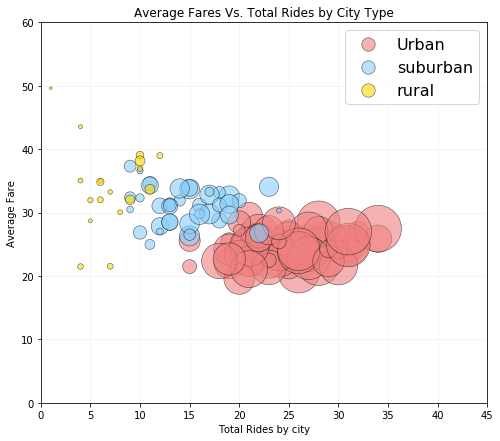

In [94]:
plt.figure(figsize=(8,7))
urban_plt = plt.scatter(urban.TotalRides,urban.AverageFares ,c="lightcoral",label="Urban",
                        s=(urban.TotalDrivers), alpha = 0.6, edgecolor = "black", linewidths = .6)

suburban_plt = plt.scatter(suburban.TotalRides,suburban.AverageFares ,c="lightskyblue",label="suburban",
                        s=(suburban.TotalDrivers), alpha = 0.6, edgecolor = "black", linewidths = .6)

rural_plt = plt.scatter(rural.TotalRides,rural.AverageFares ,c="gold",label="rural",
                        s=(rural.TotalDrivers), alpha = 0.6, edgecolor = "black", linewidths = .6)

plt.ylim(0, 60)
plt.xlim(0, 45)

lgnd = plt.legend(handles=[urban_plt, suburban_plt, rural_plt], scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [180]
lgnd.legendHandles[1]._sizes = [180]
lgnd.legendHandles[2]._sizes = [180]
plt.title("Average Fares Vs. Total Rides by City Type")
plt.xlabel("Total Rides by city")
plt.ylabel("Average Fare")
plt.grid(alpha=.15)
plt.show()


# Pie Charts - % of Total Fares by City Type

In [105]:
citytype_fares = master_df.groupby(['type'])['fare'].sum()
total_fares = master_df['fare'].sum()
citytype_fares_pct = citytype_fares/total_fares
citytype_fares_pct

type
Rural       0.065798
Suburban    0.314458
Urban       0.619745
Name: fare, dtype: float64

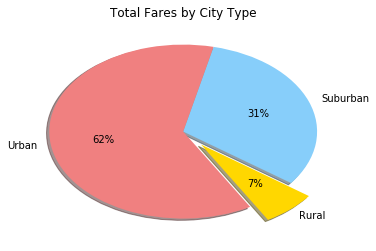

In [118]:
citytype_labels = ['Rural','Suburban','Urban']
plt.pie(citytype_fares_pct,labels=citytype_labels,explode = (.2,0,0),colors = ["gold","lightskyblue",'lightcoral'],
        autopct='%.f%%', startangle = 300, shadow = True)
plt.title("Total Fares by City Type")
plt.show()


# Pie Chart - % of Total Rides by City Type

In [117]:
citytype_rides=master_df.groupby(['type'])['city'].count()
total_rides=master_df.city.count()
citytype_rides_pct = citytype_rides/total_rides
citytype_rides_pct


type
Rural       0.051932
Suburban    0.272954
Urban       0.675114
Name: city, dtype: float64

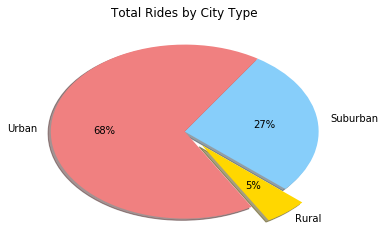

In [119]:
citytype_labels = ['Rural','Suburban','Urban']
plt.pie(citytype_rides_pct,labels=citytype_labels,explode = (.2,0,0),colors = ["gold","lightskyblue",'lightcoral'],
        autopct='%.f%%', startangle = 300, shadow = True)
plt.title("Total Rides by City Type")
plt.show()


# Pie Chart - % of Total Drivers by City Type

In [121]:
citytype_drivers=city_df.groupby(['type'])['driver_count'].sum()
total_drivers=city_df.driver_count.sum()
citytype_drivers_pct = citytype_drivers/total_drivers
citytype_drivers_pct

type
Rural       0.031054
Suburban    0.190505
Urban       0.778441
Name: driver_count, dtype: float64

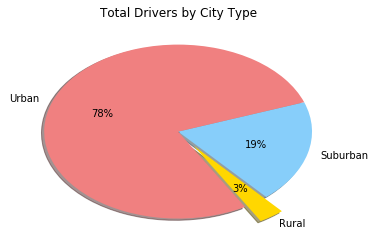

In [122]:
citytype_labels = ['Rural','Suburban','Urban']
plt.pie(citytype_drivers_pct,labels=citytype_labels,explode = (.2,0,0),colors = ["gold","lightskyblue",'lightcoral'],
        autopct='%.f%%', startangle = 300, shadow = True)
plt.title("Total Drivers by City Type")
plt.show()
